# Example of analysis of the LHC lattice
## Importing a collider
First of all we need to load our collider. 
This is a json file that contains all the information on the collider.
Namely it contains the two lines `lhcb1` and `lhcb2` corresponding to the two beams.

In [1]:
import xtrack as xt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xpart as xp
import yaml

collider = xt.Multiline.from_json('../data/collider_thin.json')

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           


Let's look at attributes and methods of the collider

In [2]:
print(dir(collider))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_multiline_vars', '_var_sharing', '_xdeps_manager', '_xdeps_vref', 'apply_filling_pattern', 'build_trackers', 'configure_beambeam_interactions', 'copy', 'discard_trackers', 'from_dict', 'from_json', 'install_beambeam_interactions', 'lhcb1', 'lhcb1_co_ref', 'lhcb2', 'lhcb2_co_ref', 'line_names', 'lines', 'match', 'match_knob', 'to_dict', 'to_json', 'twiss', 'vars', 'varval']


In [3]:
# We can see that we have two lines, lhcb1 and lhcb2, we look at the lhcb1 line
my_dict = collider.lhcb1.to_dict()
# We can look at the attributes and methods of the elements

In [4]:
# Let's look at the attributes and methods of the one element of the lhcb1 line
#collider.lhcb1.to_dict()['elements']['mqwa.a4r3.b1..1']
# %%
# We can se that this is a multipole and we can get, for example, the quadrupole strength
print('The quadrupole strength is', my_dict["elements"]["mqwa.a4r3.b1..1"]["knl"][1])

The quadrupole strength is -0.0009644776680000001


In [5]:
# In the dictionary we have also informations on the reference particle
my_dict['particle_ref']

{'start_tracking_at_element': -1,
 'q0': 1.0,
 'mass0': 938272088.16,
 's': array([0.]),
 'zeta': array([0.]),
 'chi': array([1.]),
 'charge_ratio': array([1.]),
 'weight': array([1.]),
 'particle_id': array([0]),
 'at_element': array([0]),
 'at_turn': array([0]),
 'state': array([1]),
 'parent_particle_id': array([0]),
 '_rng_s1': array([0], dtype=uint32),
 '_rng_s2': array([0], dtype=uint32),
 '_rng_s3': array([0], dtype=uint32),
 '_rng_s4': array([0], dtype=uint32),
 'x': array([0.]),
 'y': array([0.]),
 'px': array([0.]),
 'py': array([0.]),
 'delta': LinkedArrayCpu([0.]),
 'ptau': LinkedArrayCpu([0.]),
 'rvv': LinkedArrayCpu([1.]),
 'rpp': LinkedArrayCpu([1.]),
 'p0c': array([6.99999994e+12]),
 'beta0': array([0.99999999]),
 'gamma0': array([7460.52247353])}

In [6]:
# Now we want to see some optics quantities
# In Xsuite a Twiss is performed by tracking a particle with a given initial condition (0,0,0,0,0,0 by default) 
# We need to build the trackers for each line
# WARNING: elements CANNOT be removed/added after the tracker is built
# you need to deprecate the tracker before modifying the line and build it again
collider.build_trackers()

Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


In [7]:
# Now we can perform the Twiss of both lines
# We will concentrate on the lhcb1 line but the same procedure can be applied to the lhcb2 line
twiss_b1 = collider['lhcb1'].twiss()
twiss_b2 = collider['lhcb2'].twiss().reverse()

In [8]:
# The twiss is a dataframe with the following columns:
print(twiss_b1.cols)
# get a pandas dataframe with the twiss data

<name s x px y py zeta delta ptau betx bety alfx alfy gamx gamy dx dpx dy dpy dx_zeta dy_zeta betx1 bety1 betx2 bety2 mux muy muzeta nux nuy nuzeta W_matrix dzeta dmux dmuy>


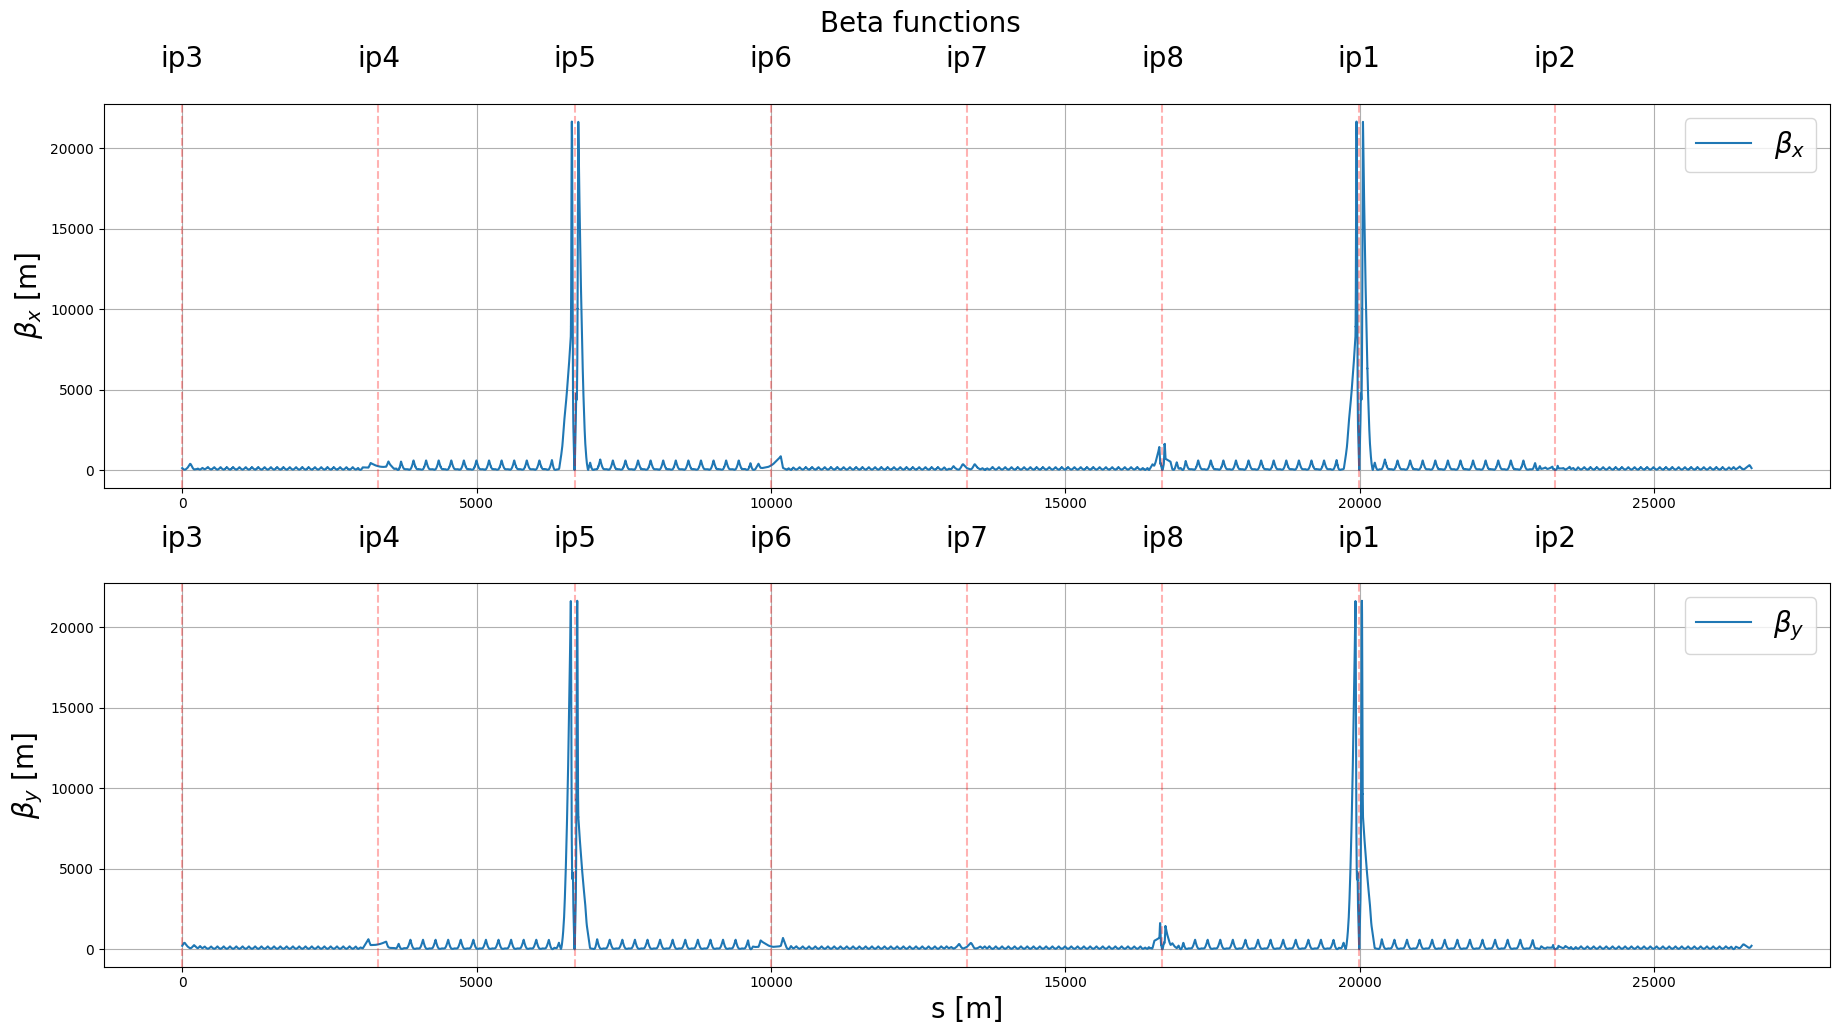

In [9]:
#First of all let's plot the beta functions!
fig, ax = plt.subplots(2,1)
fig.set_size_inches(18.5, 10.5)
fontsize = 20
fig.suptitle('Beta functions',fontsize = fontsize )
ax[0].plot(twiss_b1['s'], twiss_b1['betx'], label = r'$\beta_{x}$')
ax[0].set_ylabel(r'$\beta_{x}$ [m]', fontsize = fontsize)
ax[0].grid()
ax[0].legend(fontsize = fontsize)

ax[1].plot(twiss_b1['s'], twiss_b1['bety'], label = r'$\beta_{y}$')
ax[1].set_ylabel(r'$\beta_{y}$ [m]', fontsize = fontsize)
ax[1].set_xlabel('s [m]', fontsize = fontsize)
ax[1].grid()


ax[1].legend(fontsize = fontsize)
#We plot the ip names on the plot to follow what is happening
for ii in collider['lhcb1'].element_names:
    if (ii.startswith('ip') and len(ii)==3):
        ax[0].axvline(twiss_b1[['s'],ii], color = 'red', linestyle = '--', alpha = 0.3)
        ax[1].axvline(twiss_b1[['s'],ii], color = 'red', linestyle = '--', alpha = 0.3)
        #write the name of the ip on the plot as an upper label at the top of the plot
        ax[0].text(twiss_b1[['s'],ii], max(ax[0].get_yticks()), ii, fontsize = fontsize, horizontalalignment='center')
        ax[1].text(twiss_b1[['s'],ii], max(ax[1].get_yticks()), ii, fontsize = fontsize, horizontalalignment='center')

plt.tight_layout()

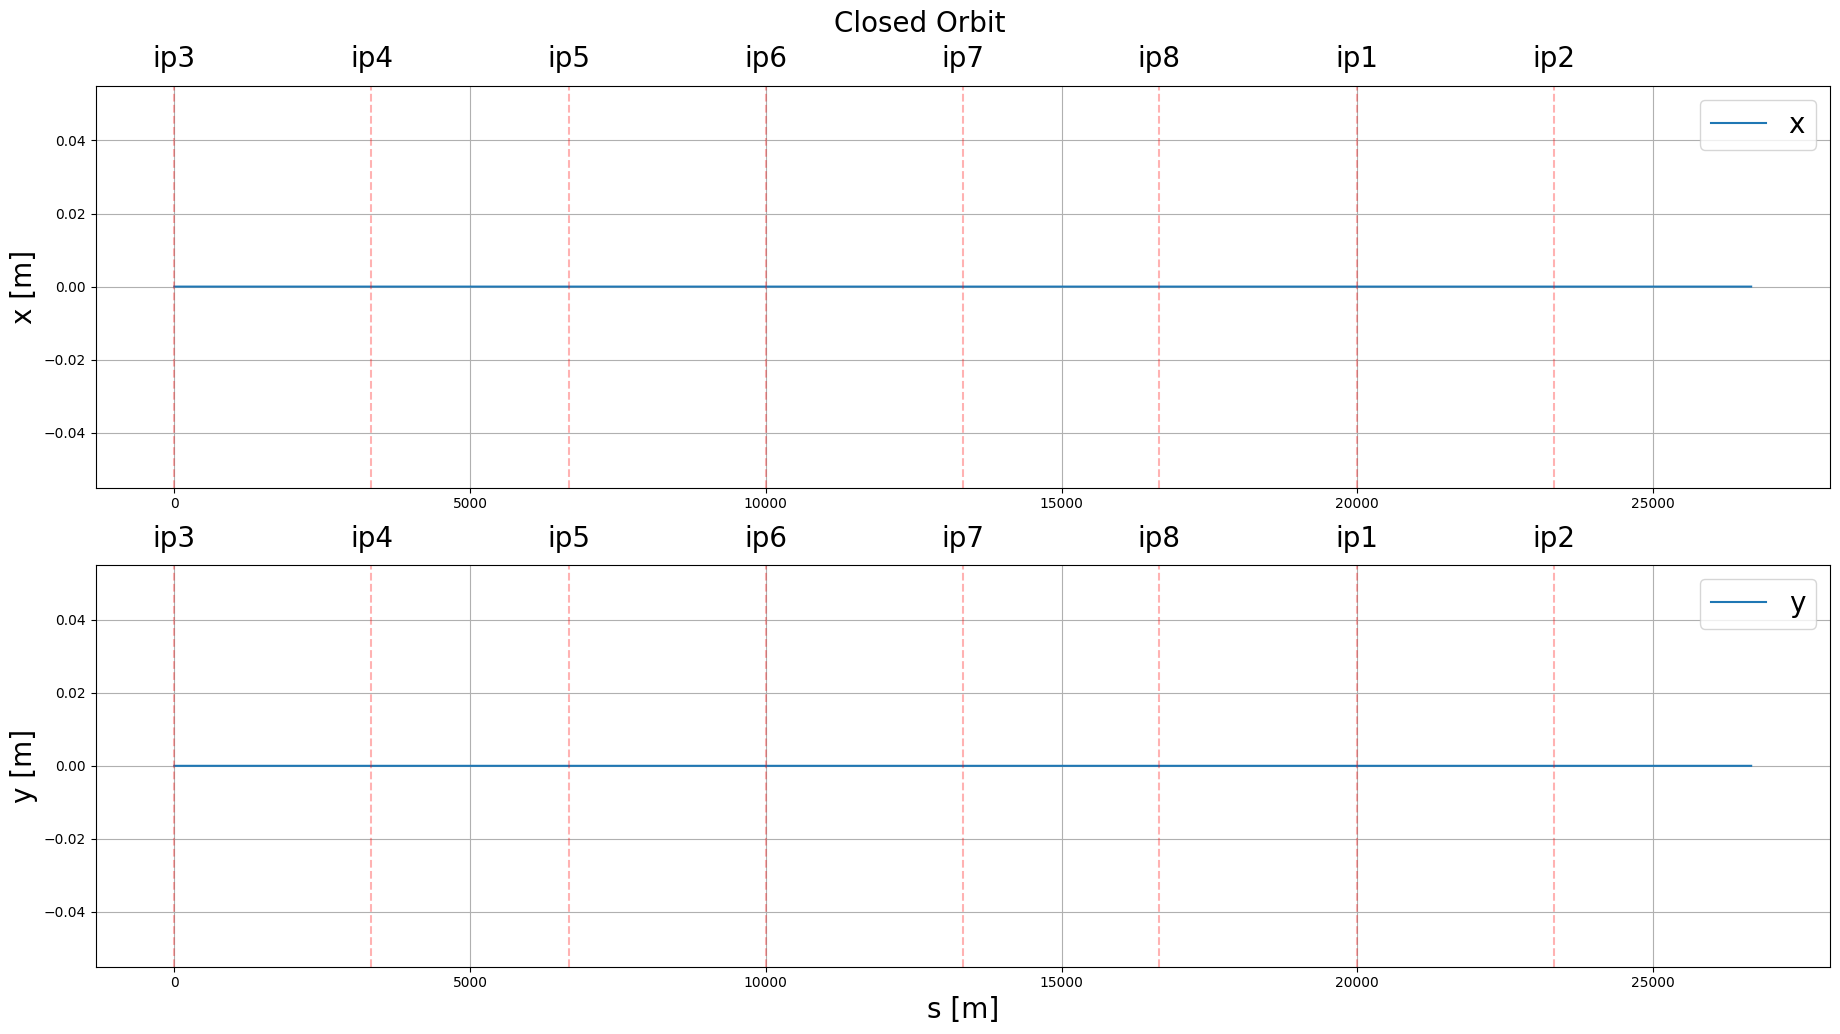

In [10]:
#We can also have a look at the closed orbit
fig, ax = plt.subplots(2,1)
fig.set_size_inches(18.5, 10.5)
fontsize = 20
fig.suptitle('Closed Orbit', fontsize = fontsize)
ax[0].plot(twiss_b1['s'], twiss_b1['x'], label = r'x')
ax[0].legend(fontsize = fontsize)
ax[0].set_ylabel(r'x [m]', fontsize = fontsize)
ax[0].grid()
ax[1].plot(twiss_b1['s'], twiss_b1['y'], label = r'y')
ax[1].set_ylabel(r'y [m]', fontsize = fontsize)
ax[1].set_xlabel('s [m]', fontsize = fontsize)
ax[1].grid()
ax[1].legend(fontsize = fontsize)
for ii in collider['lhcb1'].element_names:
    if (ii.startswith('ip') and len(ii)==3):
        ax[0].axvline(twiss_b1[['s'],ii], color = 'red', linestyle = '--', alpha = 0.3)
        ax[0].text(twiss_b1[['s'],ii], max(ax[0].get_yticks()), ii, fontsize = fontsize, horizontalalignment='center')
        ax[1].axvline(twiss_b1[['s'],ii], color = 'red', linestyle = '--', alpha = 0.3)
        ax[1].text(twiss_b1[['s'],ii], max(ax[1].get_yticks()), ii, fontsize = fontsize, horizontalalignment='center')

plt.tight_layout()

In [11]:
#All the useful informations are stored in the twiss dataframe, for example the tune...
print('The horizontal tune is', twiss_b1["mux"][-1])
print('The vertical tune is', twiss_b1["muy"][-1])

The horizontal tune is 62.31000050994824
The vertical tune is 60.320000415958646


The knob on_x1 is now 150
The crossing angle at IP8 is 149.7064838146862


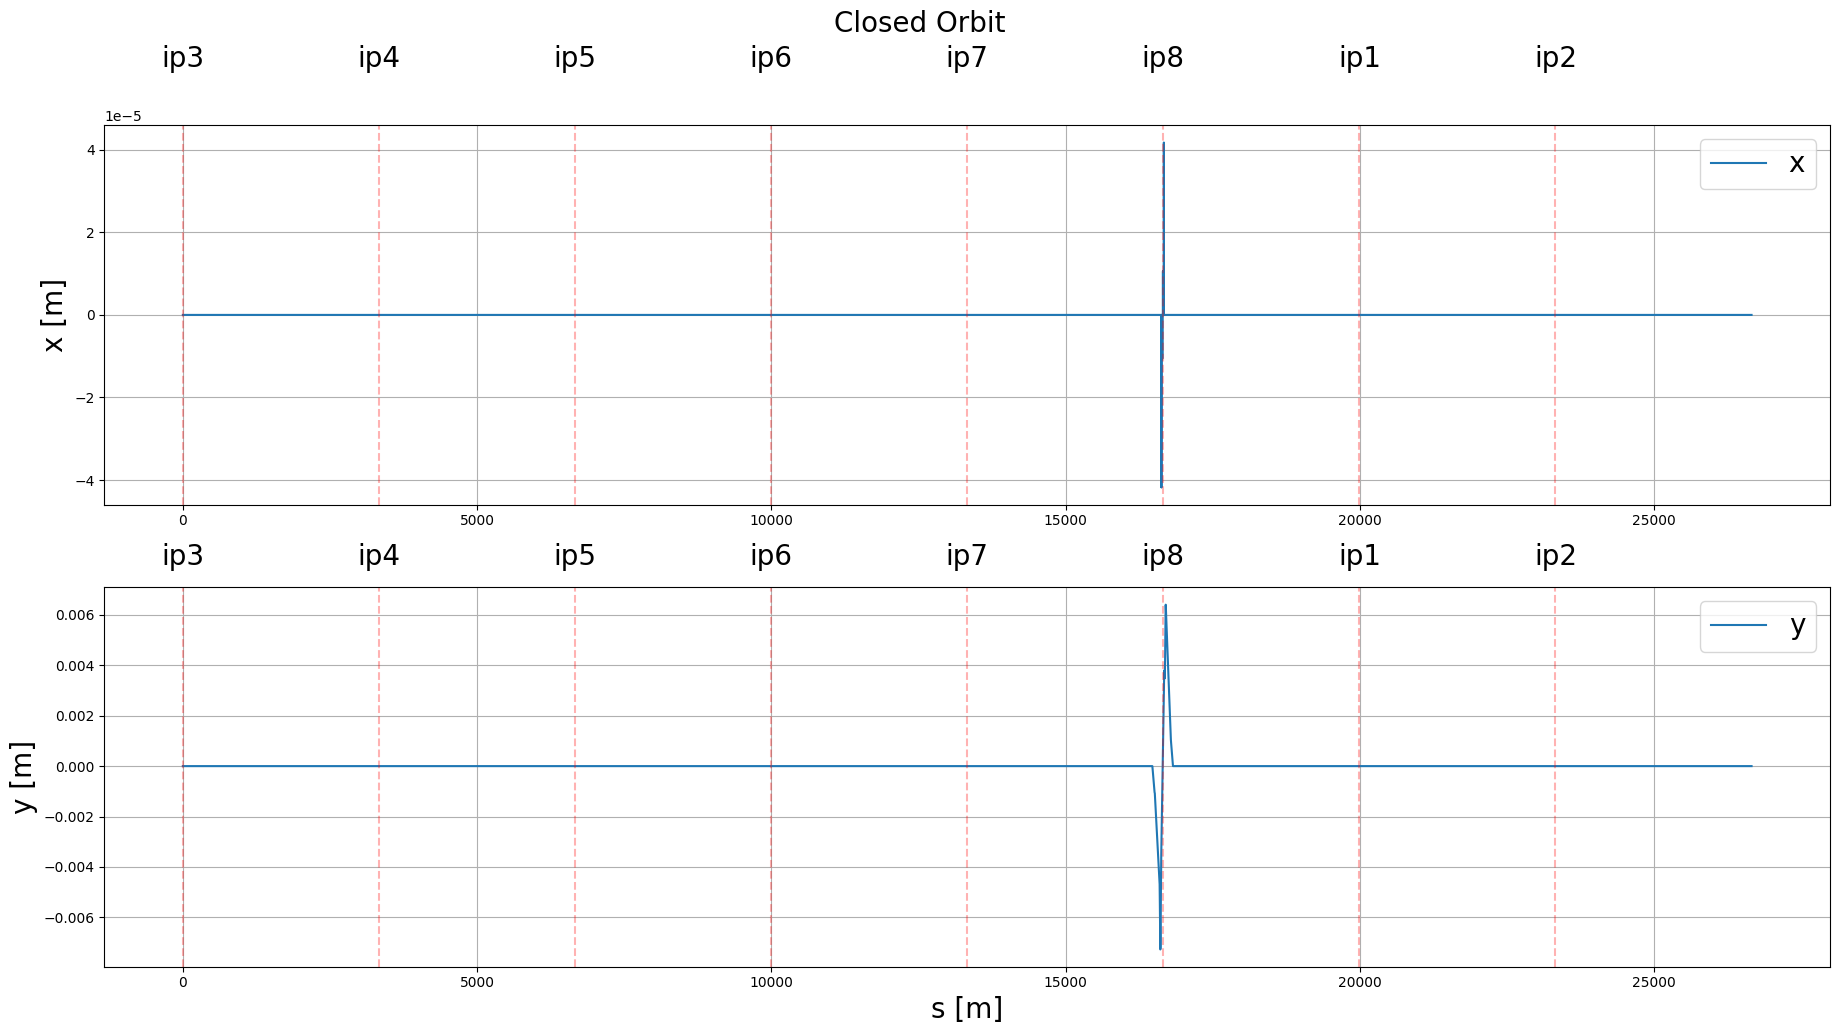

In [12]:
# We want to change the optics of the line
# To do this we need to use the knobs, which control the lens of the line
# We can have a configuration file with the knob settings, or we can set them manually
# Let's start with the manual setting of a knob
# We change the (half) crossing angle at IP8 to 170 urad
collider.vars['on_x8v'] = 150
# We can check that the knob has been changed
print('The knob on_x1 is now',collider.vars["on_x8v"]._value)
# We can now perform the twiss again
twiss_b1 = collider['lhcb1'].twiss()
# And plot the closed orbit
fig, ax = plt.subplots(2,1)
fig.set_size_inches(18.5, 10.5)
fontsize = 20
fig.suptitle('Closed Orbit', fontsize = fontsize)
ax[0].plot(twiss_b1['s'], twiss_b1['x'], label = r'x')
ax[0].legend(fontsize = fontsize)
ax[0].set_ylabel(r'x [m]', fontsize = fontsize)
ax[0].grid()

ax[1].plot(twiss_b1['s'], twiss_b1['y'], label = r'y')
ax[1].set_ylabel(r'y [m]', fontsize = fontsize)
ax[1].set_xlabel('s [m]', fontsize = fontsize)
ax[1].grid()
ax[1].legend(fontsize = fontsize)
for ii in collider['lhcb1'].element_names:
    if (ii.startswith('ip') and len(ii)==3):
        ax[0].axvline(twiss_b1[['s'],ii], color = 'red', linestyle = '--', alpha = 0.3)
        ax[0].text(twiss_b1[['s'],ii], max(ax[0].get_yticks()), ii, fontsize = fontsize, horizontalalignment='center')
        ax[1].axvline(twiss_b1[['s'],ii], color = 'red', linestyle = '--', alpha = 0.3)
        ax[1].text(twiss_b1[['s'],ii], max(ax[1].get_yticks()), ii, fontsize = fontsize, horizontalalignment='center')
plt.tight_layout()
#Is it what we expected?
max_y = np.max(twiss_b1['y'])
min_y = np.min(twiss_b1['y'])
s_max_y = twiss_b1['s'][np.argmax(twiss_b1['y'])]
s_min_y = twiss_b1['s'][np.argmin(twiss_b1['y'])]
theta_crossing_IP8 = (max_y-min_y)/(s_max_y-s_min_y)
print('The crossing angle at IP8 is', theta_crossing_IP8*1e6)
#We retrieve the knob value!

Setting optics as from config


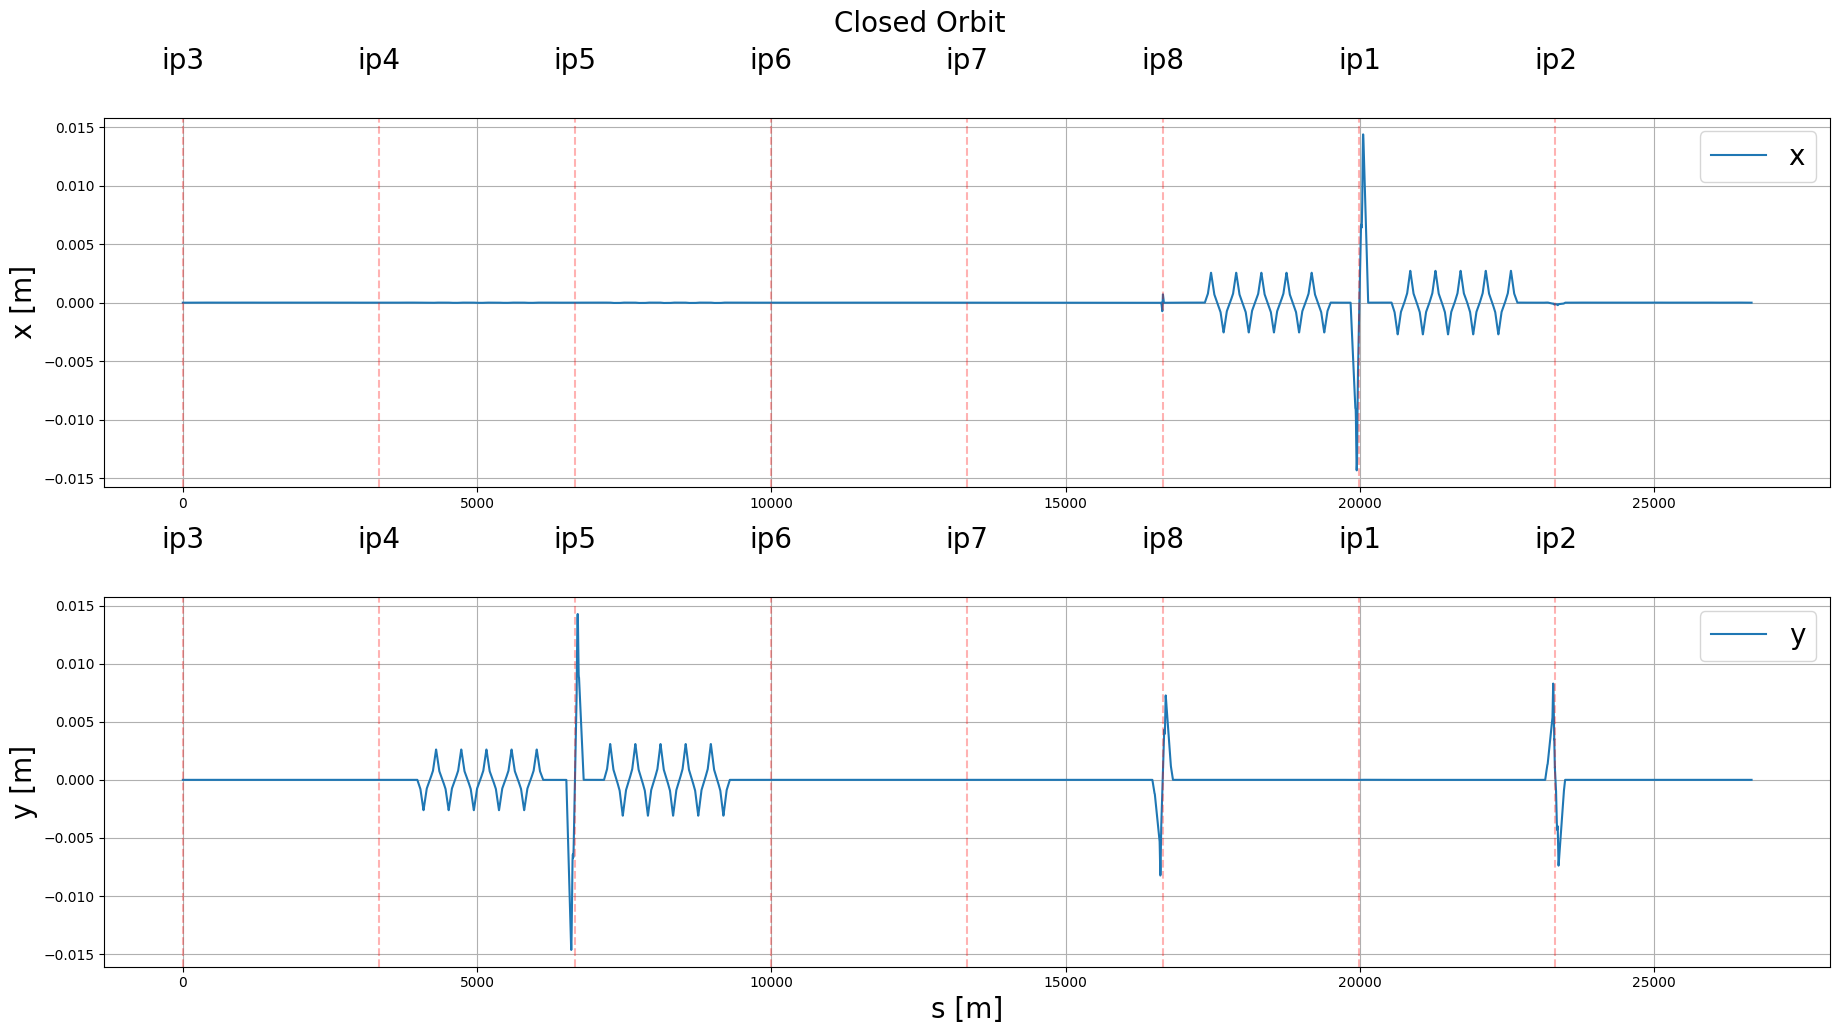

In [13]:
#Now let's change the knobs from a config file
with open('../data/config.yaml', "r") as fid:
        config = yaml.safe_load(fid)
    
def set_orbit_from_config(collider, config):
    print('Setting optics as from config')
    for ii in ['on_x1', 'on_sep1', 'on_x2', 'on_sep2', 'on_x5',
               'on_sep5', 'on_x8h', 'on_x8v', 'on_sep8h', 'on_sep8v',
               'on_a1', 'on_o1', 'on_a2', 'on_o2', 'on_a5', 'on_o5', 'on_a8', 
               'on_o8', 'on_disp', 'on_crab1', 'on_crab5', 'on_alice_normalized', 
               'on_lhcb_normalized', 'on_sol_atlas', 'on_sol_cms', 'on_sol_alice', 
               'vrf400', 'lagrf400.b1', 'lagrf400.b2']:
        collider.vars[ii] = config['config_collider']['config_knobs_and_tuning']['knob_settings'][ii]

set_orbit_from_config(collider, config)

twiss_b1 = collider['lhcb1'].twiss()
twiss_b2 = collider['lhcb2'].twiss().reverse()
# And plot the closed orbit
fig, ax = plt.subplots(2,1)
fig.set_size_inches(18.5, 10.5)
fontsize = 20
fig.suptitle('Closed Orbit', fontsize = fontsize)
ax[0].plot(twiss_b1['s'], twiss_b1['x'], label = r'x')
ax[0].legend(fontsize = fontsize)
ax[0].set_ylabel(r'x [m]', fontsize = fontsize)
ax[0].grid()

ax[1].plot(twiss_b1['s'], twiss_b1['y'], label = r'y')
ax[1].set_ylabel(r'y [m]', fontsize = fontsize)
ax[1].set_xlabel('s [m]', fontsize = fontsize)
ax[1].grid()
ax[1].legend(fontsize = fontsize)
for ii in collider['lhcb1'].element_names:
    if (ii.startswith('ip') and len(ii)==3):
        ax[0].axvline(twiss_b1[['s'],ii], color = 'red', linestyle = '--', alpha = 0.3)
        ax[0].text(twiss_b1[['s'],ii], max(ax[0].get_yticks()), ii, fontsize = fontsize, horizontalalignment='center')
        ax[1].axvline(twiss_b1[['s'],ii], color = 'red', linestyle = '--', alpha = 0.3)
        ax[1].text(twiss_b1[['s'],ii], max(ax[1].get_yticks()), ii, fontsize = fontsize, horizontalalignment='center')
plt.tight_layout()
#Now we activated different knobs!